In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [23]:
Profit = pd.read_csv("C://Users//LENOVO//Downloads//50_Startups.csv")

In [24]:
Profit.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [25]:
Profit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RandD_Spend      50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [26]:
Profit.corr()

,RandD_Spend,Administration,Marketing_Spend,Profit
RandD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


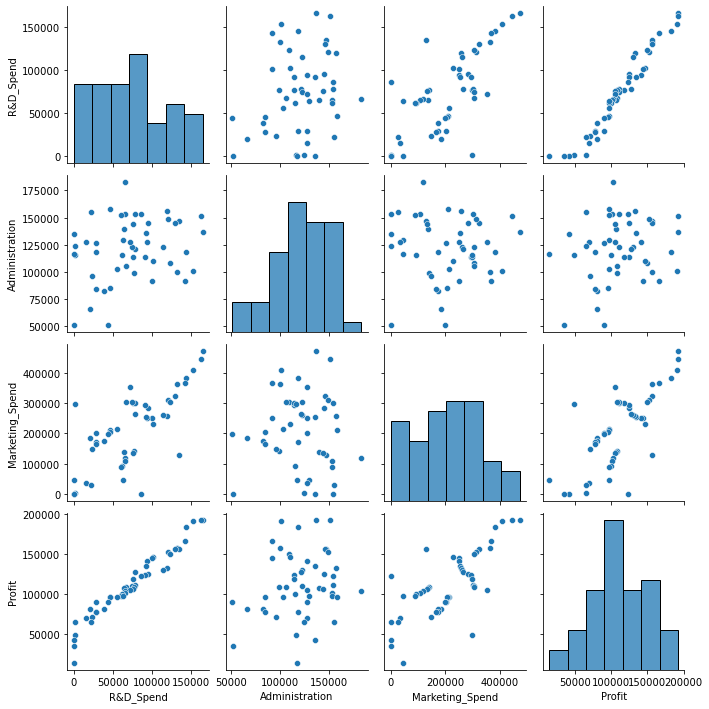

In [16]:
sns.pairplot(Profit)

In [28]:
import statsmodels.formula.api as smf
model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=Profit).fit()

In [30]:
model.params

Intercept          50122.192990
RandD_Spend            0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [32]:
print(model.tvalues)

Intercept           7.626218
RandD_Spend        17.846374
Administration     -0.525507
Marketing_Spend     1.655077
dtype: float64


In [34]:
print(model.pvalues)

Intercept          1.057379e-09
RandD_Spend        2.634968e-22
Administration     6.017551e-01
Marketing_Spend    1.047168e-01
dtype: float64


In [35]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

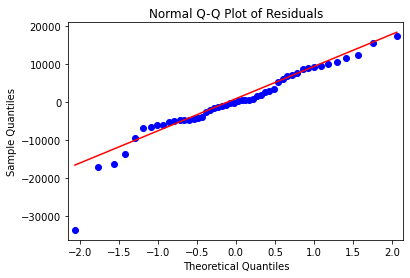

In [39]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q Plot of Residuals")
plt.show()

In [40]:
list(np.where(model.resid<-30000))

[array([49], dtype=int32)]

In [55]:
def get_standardized_values( vals ):
 return (vals-vals.mean())/vals.std()

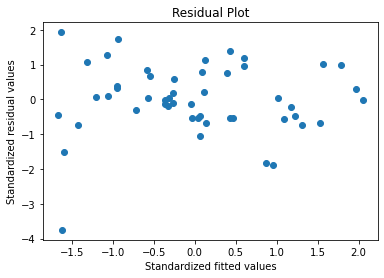

In [61]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

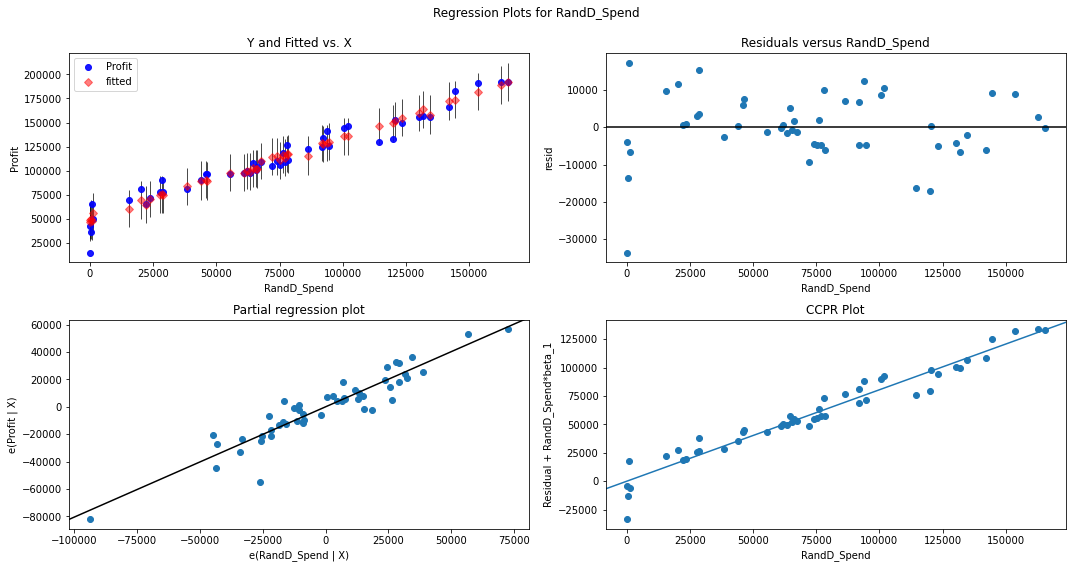

In [62]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"RandD_Spend",fig=fig)

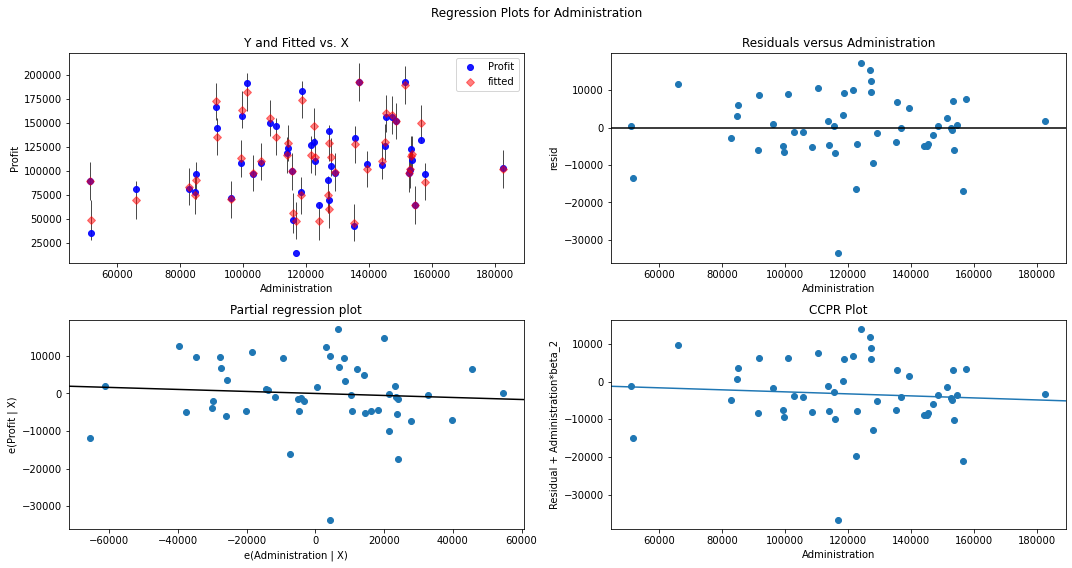

In [63]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Administration",fig=fig)

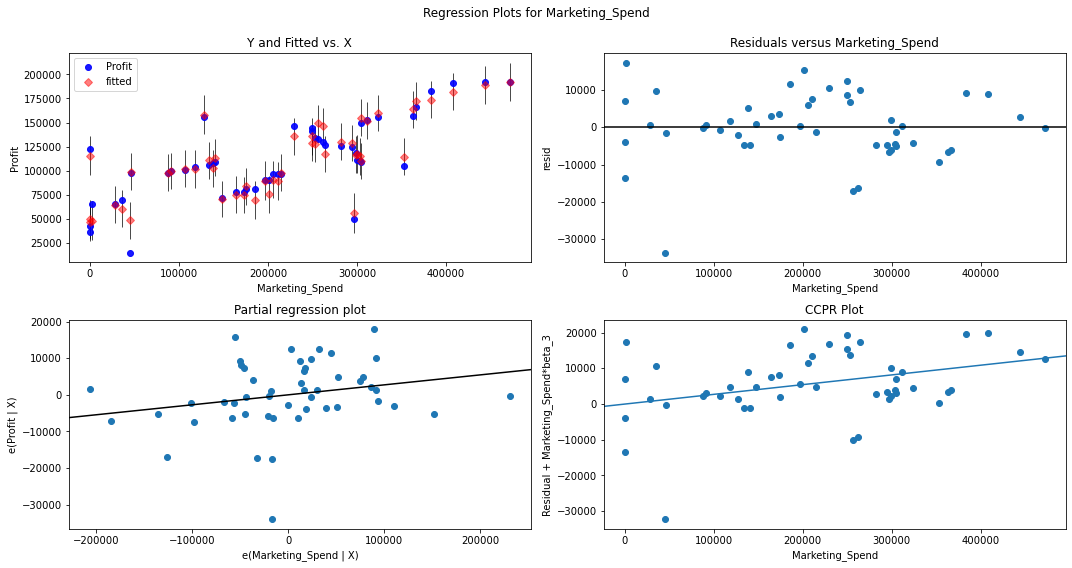

In [64]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model,"Marketing_Spend",fig=fig)

In [65]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

<StemContainer object of 3 artists>

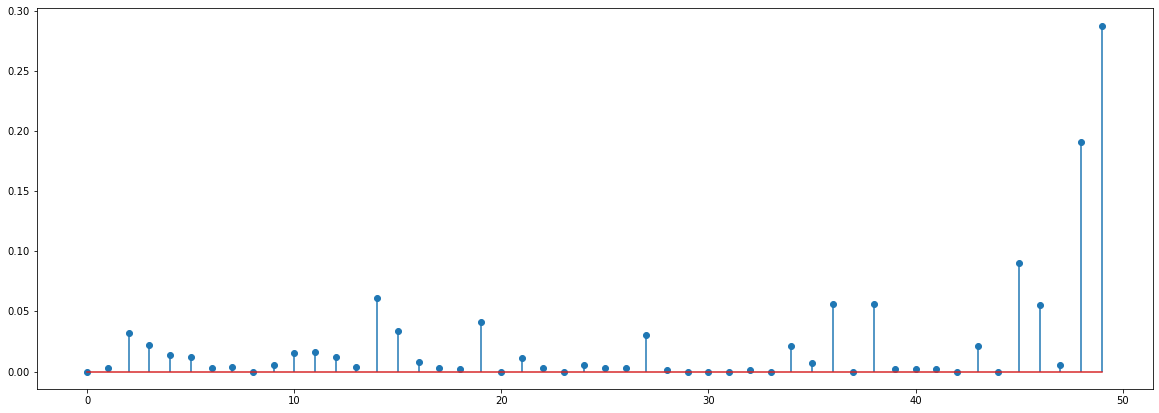

In [77]:
fig =plt.subplots(figsize=(20,7))       
plt.stem(np.arange(len(Profit)),np.round(c,3))

In [78]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543268)

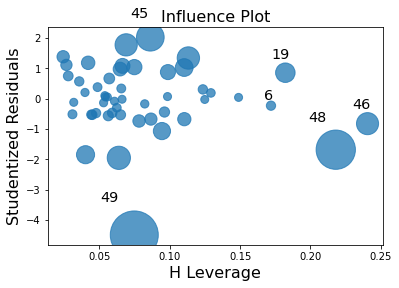

In [79]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [80]:
k = Profit.shape[1]
n = Profit.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [81]:
leverage_cutoff

0.36

In [82]:
Profit[Profit.index.isin([49])]

,RandD_Spend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [83]:
Profit.head()

,RandD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [93]:
final_model = smf.ols('Profit~RandD_Spend+Administration+Marketing_Spend',data=Profit).fit()

In [94]:
(final_model.rsquared,final_model.aic)

(0.9507459940683246, 1058.7714985998055)

In [98]:
new_data = pd.DataFrame({'RandD_Spend':160000,'Administration':141000,'Marketing_Spend':360000},index=[1])

In [103]:
new_data

,RandD_Spend,Administration,Marketing_Spend
1,160000,141000,360000


In [99]:
final_model.predict(new_data)

1    185057.652761
dtype: float64